<a href="https://colab.research.google.com/github/Sciform/sciform-hwz-ai-in-controlling/blob/main/ts_01_common_patterns_hwz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Common patterns of time series - level, trend, seasonality and noise

## Setup

In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Define plot function

In [17]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label, color="green")
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

## Trend and Seasonality

### Linear upward trend

In [18]:
# this method computes a trend by multiplying a slope with the time series vector

def trend(time, slope=0):
    return slope * time

Create a time series with an upward trend

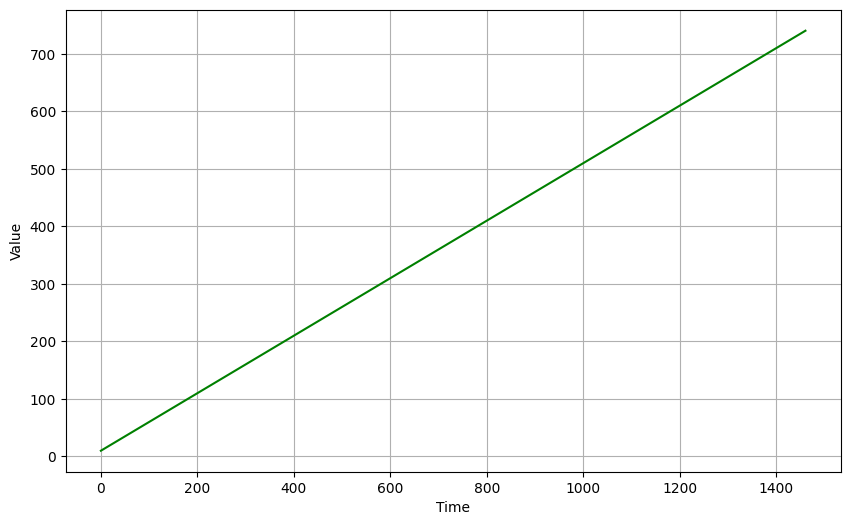

In [19]:
time = np.arange(4 * 365 + 1)

# level 
level = 10
series = level + trend(time, 0.5)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [20]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [21]:
series

array([ 10. ,  10.5,  11. , ..., 739. , 739.5, 740. ])

### Seasonality Pattern

Now let's create a time series with a seasonal pattern

In [22]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

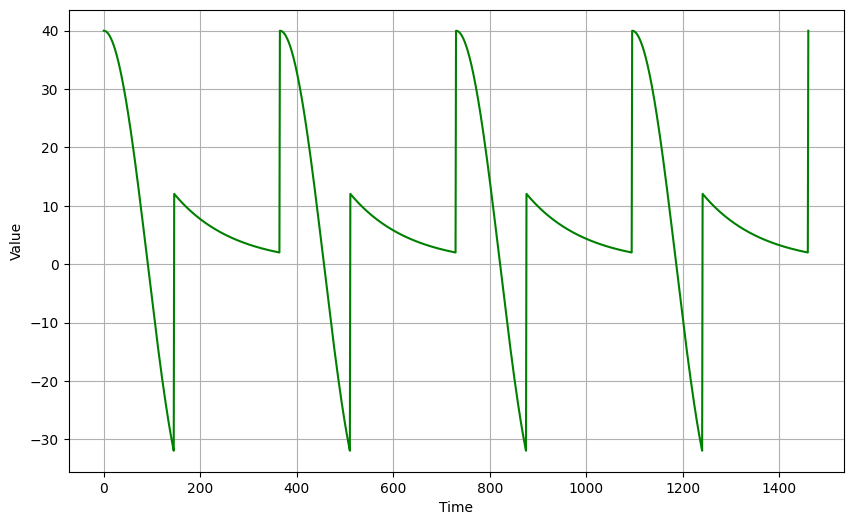

In [23]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Create an Additive Time Series without Noise

Now let's create a time series with both trend and seasonality:

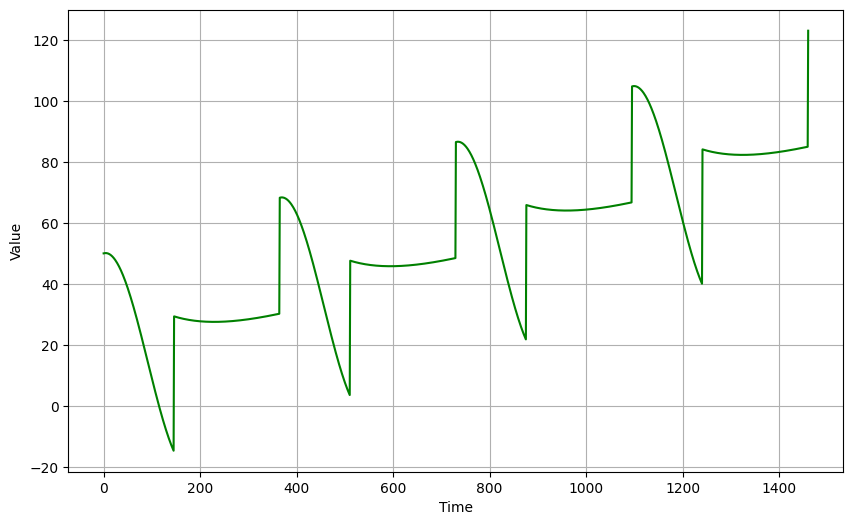

In [24]:
slope = 0.05
series = level + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Noise

In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

In [25]:
# generate some random white noise.
# white Noise is created by a continuum of frequencies equally distributed over the entire range of consideration
# https://mynoise.net/NoiseMachines/whiteNoiseGenerator.php

# randn() Return a sample (or samples) from the “standard normal” distribution with mean = 0 and std = 1

def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

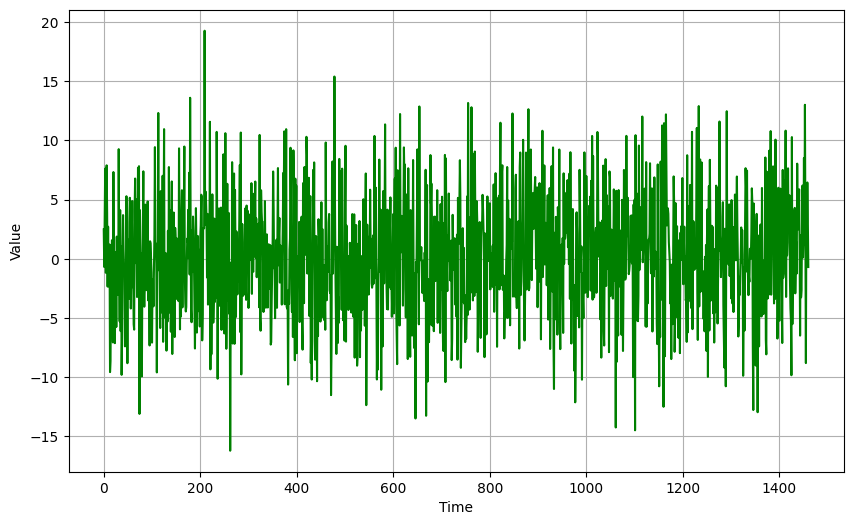

In [26]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

# Create an Additive Time Series with Noise

Now let's add this white noise to the time series:

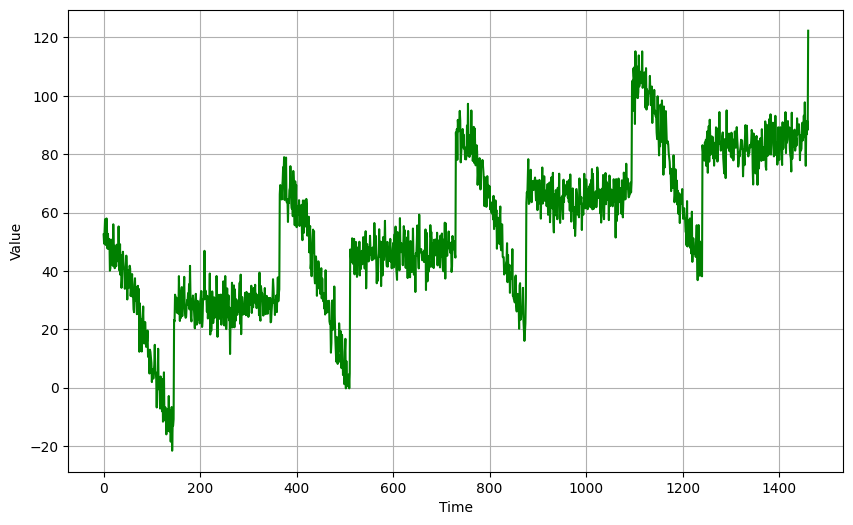

In [27]:
slope = 0.05
series = level + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude) + noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Decompose additive time series

In [28]:
import pandas as pd
from datetime import datetime, timedelta

# convert time to datetime index in pandas
date_today = datetime.now()
date_time_index = pd.date_range(date_today - timedelta(days=len(time)-1), date_today, freq='D')

# store series in pandas
df_series = pd.DataFrame({'Datetime': date_time_index, 'Time Series': series})
df_series = df_series.set_index('Datetime')

# df_series

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

result = seasonal_decompose(df_series, model='additive', period = 356) 

# print(result.trend)
# print(result.seasonal)
# print(result.resid)
# print(result.observed)

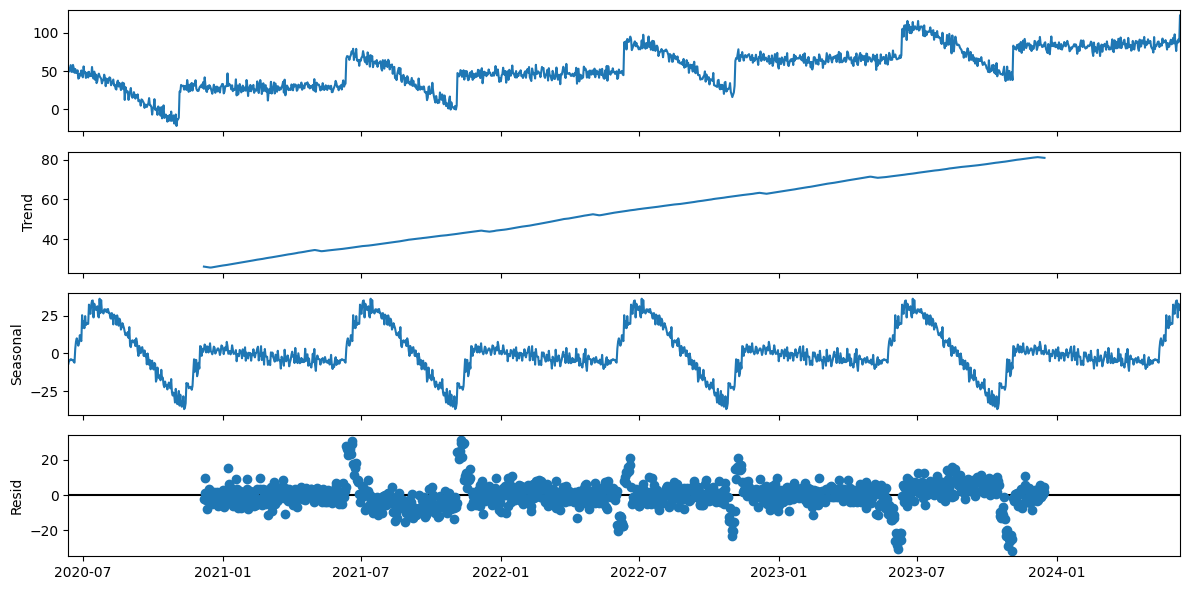

In [30]:
from matplotlib import pyplot

pyplot.rc("figure", figsize=(12,6))
result.plot()
pyplot.show()

# Create a Multiplicative Time Series

Use the above functionality and create a multiplicative time series

## Decompose multiplicative time series

Use the decomposition method from above to decompose the multiplicative time series again

In [16]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# Source: https://github.com/tensorflow/examples